In [9]:
import numpy as np
import matplotlib.pyplot as plt
from my_OIB_functions import *
import fatiando
import pandas as pd
%matplotlib inline

In [10]:
def oib_lineplot_cust(data, ptitle='test_lineplot', pname='test_lineplot'):
    import matplotlib.pyplot as plt
    data.loc[data['HYDROAPPX'] < -1500, 'HYDROAPPX'] = np.nan
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    data['FAG070'].where((data['FLTENVIRO'] == 1)).plot(ax=axes[0], legend=True, label='Disturbed', style='r-')
    data['FAG070'].where((data['FLTENVIRO'] == 0)).plot(ax=axes[0], legend=True, label='Normal', style='k-')
    # data['FAG070'].where((data['FLTENVIRO'] == -1)).plot(ax=axes[0], legend=True, label='Missing', style='b-')
#     data['ELEVATION'].plot(ax=axes[1], legend=True, style='y.')
    data['ICEBASE'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="brown")
    data['TOPOGRAPHY_radar'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="blue")
#     data['HYDROAPPX'].plot(ax=axes[1], legend=True, color='grey')
    data['SURFACE_atm'].where((data['NUMUSED'] > 77)).plot(ax=axes[1], legend=True, 
                                                           marker=".", linestyle="None", color='cyan')
    plt.suptitle(ptitle, y=0.98)
#     plt.savefig(pname, bbox_inches='tight')   # save the figure to file
#     plt.close(fig)
    return

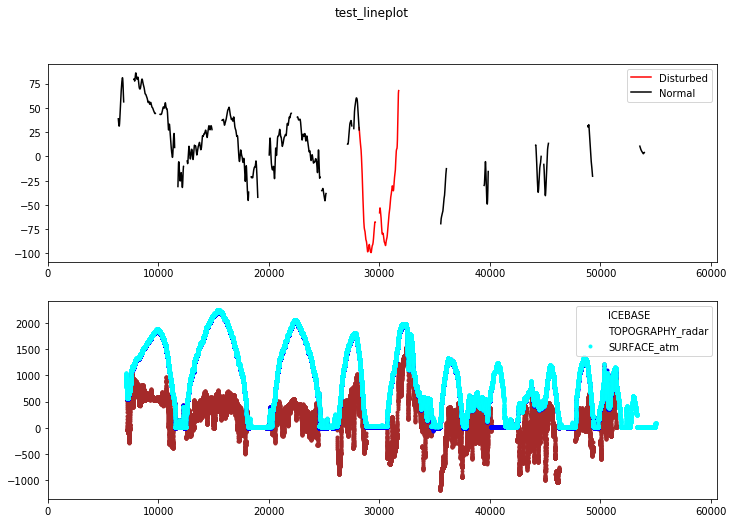

In [11]:
df = pd.read_csv('data/agg2invert/OIB_ANT_2010-05-19.csv')
oib_lineplot_cust(df)

In [12]:
segment = 1274277755
# plt.plot(df['LINE'].where((df['LINE'] == segment)))
# oib_lineplot_cust(df.where((df['LINE'] == segment)))

In [13]:
gb = df.groupby(['LINE'])

In [14]:
# gb.describe()

# gb['FAG070'].describe()

# Group the dataframe by regiment, and for each regiment,
for name, group in gb:
    # print the name of the regiment
    print(name)
    # print the data of that regiment
    print(group['FAG070'].describe())

1274263911
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: FAG070, dtype: float64
1274267105
count    487.000000
mean      57.320329
std       17.886941
min       31.140000
25%       37.385000
50%       60.430000
75%       74.285000
max       81.050000
Name: FAG070, dtype: float64
1274267348
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: FAG070, dtype: float64
1274267810
count    1938.000000
mean       65.698400
std        12.483432
min        44.020000
25%        54.975000
50%        66.820000
75%        77.900000
max        85.990000
Name: FAG070, dtype: float64
1274268779
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: FAG070, dtype: float64
1274268992
count    1320.000000
mean       34.028144
std        17.235079
min        -1.030000
25%        20.820000
50%        43.080000
75%        49.250000
ma

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


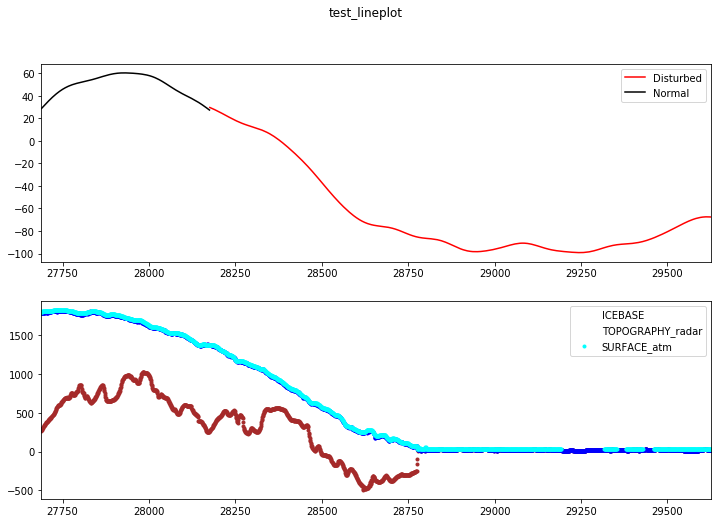

In [8]:
# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)

In [9]:
lf.head()

,iunix,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,...,SURFACE_radar,BOTTOM,QUALITY,SURFACE_atm,NUMUSED,ICEBASE,TOPOGRAPHY_radar,D_gravmask,LINE,HYDROAPPX
27689,2010-05-19 14:02:35.500,72.658552,-51.769381,2010-05-19,139,50555.5,26,-223068.90,-1879253.25,2210.22,...,434.57,1949.80,1.0,1790.8337,608.0,262.0974,1777.3274,1,1274277755,NaN
27690,2010-05-19 14:02:36.000,72.657918,-51.768901,2010-05-19,139,50556.0,26,-223061.42,-1879324.81,2211.29,...,434.58,1937.49,1.0,1791.2783,603.0,275.5374,1778.4474,1,1274277755,NaN
27691,2010-05-19 14:02:36.500,72.657284,-51.768429,2010-05-19,139,50556.5,26,-223054.20,-1879396.37,2212.35,...,434.60,1925.17,1.0,1791.7584,603.0,288.9532,1779.5232,1,1274277755,NaN
27692,2010-05-19 14:02:37.000,72.656650,-51.767963,2010-05-19,139,50557.0,26,-223047.21,-1879467.94,2213.39,...,434.61,1913.97,1.0,1801.5708,616.0,301.1545,1780.5145,1,1274277755,NaN
27693,2010-05-19 14:02:37.500,72.656015,-51.767505,2010-05-19,139,50557.5,26,-223040.48,-1879539.52,2214.40,...,434.61,1907.22,1.0,1801.5708,616.0,308.8415,1781.4515,1,1274277755,NaN


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


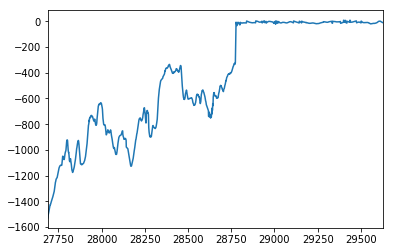

In [10]:
lf['BED_flat'] = -(lf['SURFACE_atm'] - lf['ICEBASE'])

lf['BED_flat'].plot()

# Fatiando testing
Estimate the relief of a sedimentary basin approximating by a polygon.

Currently only works with gravity data.

The top of the basin is straight and fixed at a given height. Polygon vertices are distributed evenly in the x-direction. The inversion estimates the depths of each vertex.

This is a non-linear inversion. Therefore you must configure it before running to choose a solver method and set the initial estimate. Use the config method for this.

Recommended configuration: Levemberg-Marquardt algorithm ('levmarq') with initial estimate to the average expected depth of the basin.

Typical regularization to use with this class are: Damping, Smoothness1D, TotalVariation1D.

The forward modeling is done using talwani. Derivatives are calculated using a 2-point finite difference approximation.

Tip
Use the estimate_ attribute to get a Polygon version of the estimated parameters (attribute p_).

In [18]:
from fatiando.inversion import Smoothness1D
from fatiando.gravmag.basin2d import PolygonalBasinGravity
from fatiando.gravmag import talwani
from fatiando.mesher import Polygon
from fatiando.vis import mpl
from fatiando import utils
import numpy as np
import matplotlib.pyplot as plt

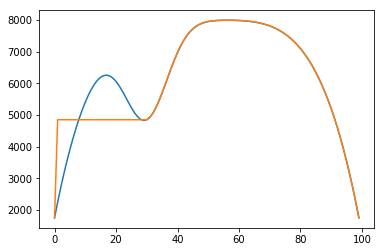

In [20]:
# Make some synthetic data to test the inversion
# The model will be a polygon.
# Reverse x because vertices must be clockwise.
xs = np.linspace(0, 100000, 100)[::-1]
depths = (-1e-15*(xs - 50000)**4 + 8000 -
          3000*np.exp(-(xs - 70000)**2/(10000**2)))
# depths[50:85] -= 2000  # DFP testing the synthetic data
# depths -= depths.min()  # Reduce depths to zero

depths_oib = np.array(depths)
depths_oib[1:30] = depths_oib[30]

plt.figure(facecolor='white')
plt.plot(depths)
plt.plot(depths_oib)

# Make a polygon from the synthetic data

In [35]:
props = {'density': -300}
model = Polygon(np.transpose([xs, depths]), props)
model_oib = Polygon(np.transpose([xs, depths_oib]), props)
# dir(model)
model.vertices

array([[ 100000.        ,    1749.62977059],
       [  98989.8989899 ,    2239.27921204],
       [  97979.7979798 ,    2699.32064798],
       [  96969.6969697 ,    3130.81070378],
       [  95959.5959596 ,    3534.70288771],
       [  94949.49494949,    3911.81380273],
       [  93939.39393939,    4262.78001658],
       [  92929.29292929,    4588.00588362],
       [  91919.19191919,    4887.60446234],
       [  90909.09090909,    5161.3363028 ],
       [  89898.98989899,    5408.55418423],
       [  88888.88888889,    5628.16552237],
       [  87878.78787879,    5818.6275127 ],
       [  86868.68686869,    5977.99222157],
       [  85858.58585859,    6104.01869149],
       [  84848.48484848,    6194.36560634],
       [  83838.38383838,    6246.8703888 ],
       [  82828.28282828,    6259.90864066],
       [  81818.18181818,    6232.81240524],
       [  80808.08080808,    6166.3087692 ],
       [  79797.97979798,    6062.92481393],
       [  78787.87878788,    5927.29450982],
       [  

# Forward Model to get FAG

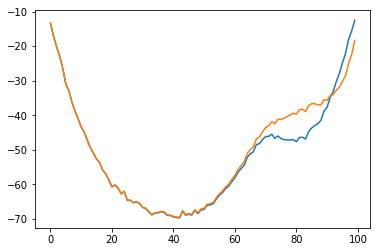

In [28]:
x = np.linspace(0, 100000, 100)
z = -100*np.ones_like(x)
data = utils.contaminate(talwani.gz(x, z, [model]), 0.5, seed=0)
data_oib = utils.contaminate(talwani.gz(x, z, [model_oib]), 0.5, seed=0)

# data[85:-1] = np.diff(data[85:-1].values)# - (data[85:-1] - data[84:-2])
plt.plot(data)
plt.plot(data_oib)

# Construct a solver
Each class represents a regularizing function. They can be used by adding them to a Misfit derivative (all inversions in Fatiando are derived from Misfit). The regularization parameter is set by multiplying the regularization instance by a scalar, e.g., solver = misfit + 0.1*regularization.

In [29]:
# Make the solver using smoothness regularization and run the inversion
misfit = PolygonalBasinGravity(x, z, data, 50, props, top=0)
regul = Smoothness1D(misfit.nparams)
solver = misfit + 1e-4*regul


# This is a non-linear problem so we need to pick an initial estimate
initial = 3000*np.ones(misfit.nparams)
solver.config('levmarq', initial=initial).fit()

/usr/local/lib/python2.7/site-packages/fatiando/inversion/optimization.py:302: RuntimeWarning: Exited because maximum iterations reached. Might not have achieved convergence. Try inscreasing the maximum number of iterations allowed.
  RuntimeWarning)


# Solve
This is a non-linear problem so we need to pick an initial estimate


In [30]:
initial = 3000*np.ones(misfit.nparams)
solver.config('levmarq', initial=initial).fit()

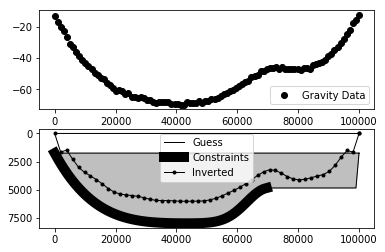

In [31]:
mpl.figure(facecolor='white')
mpl.subplot(2, 1, 1)
mpl.plot(x, data, 'ok', label='Gravity Data')
# mpl.plot(x, solver[0].predicted(), '-r', linewidth=2, label='predicted Gravity')
mpl.legend()
ax = mpl.subplot(2, 1, 2)
mpl.polygon(model_oib, fill='gray', alpha=0.5, label='Guess')
# The estimate_ property of our solver gives us the estimate basin as a polygon
# So we can directly pass it to plotting and forward modeling functions
mpl.plot(x[:70], depths[:29:-1], color='black', linewidth=10, label='Constraints')
mpl.polygon(solver.estimate_, style='.-k', label='Inverted')
ax.invert_yaxis()
mpl.legend()
mpl.show()

"The estimated parameter vector is stored in the p_ attribute. Misfit also provides a estimate_ attribute that can be a custom (user defined) formatted version of p_. It’s better to use estimate_ if you’re not interested in the parameter vector as it is. Since we didn’t implement this custom formatting, both should give the same value."

In [6]:
print solver.p_
# print solver.estimate_
print solver[0].predicted()

NameError: name 'solver' is not defined

# Back to Greenland


In [17]:
bottom = -np.array(lf['BED_flat'])
fag070 = -np.array(lf['FAG070'])
xs = np.linspace(0, 100000, len(bottom))[::-1]
x = np.linspace(0, 100000, len(bottom))
z = -100*np.ones_like(x)

# Make a "water" block
bottom[1085:] = bottom[1085]
# depths = [0,[bottom],0]
bottom[0] = 0 
bottom[len(bottom)-1] = 0
plt.plot(bottom)

NameError: name 'lf' is not defined

In [16]:
bottom -= bottom.min()  # Reduce depths to zero
plt.plot(bottom)

NameError: name 'bottom' is not defined

In [15]:
props = {'density': -1700}
model_real = Polygon(np.transpose([xs, bottom]), props)

NameError: name 'bottom' is not defined

In [31]:
# Make the solver using smoothness regularization and run the inversion
misfit = PolygonalBasinGravity(x, z, fag070, 50, props, top=0)
regul = Smoothness1D(misfit.nparams)
solver = misfit + 1e-4*regul

In [32]:
# This is a non-linear problem so we need to pick an initial estimate
initial = 300*np.ones(misfit.nparams)
solver.config('levmarq', initial=initial).fit()

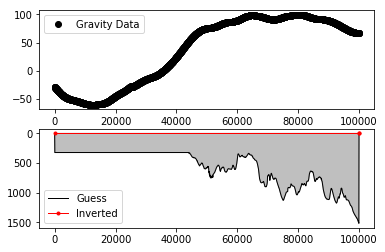

In [33]:
mpl.figure()
mpl.subplot(2, 1, 1)
mpl.plot(x, fag070, 'ok', label='Gravity Data')
# mpl.plot(x, solver[0].predicted(), '-r', linewidth=2, label='predicted Gravity')
mpl.legend()
ax = mpl.subplot(2, 1, 2)
mpl.polygon(model_real, fill='gray', alpha=0.5, label='Guess')
# The estimate_ property of our solver gives us the estimate basin as a polygon
# So we can directly pass it to plotting and forward modeling functions
# mpl.plot(x[:70], bottom[:29:-1], color='black', linewidth=10, label='Constraints')
mpl.polygon(solver.estimate_, style='.-r', label='Inverted')
ax.invert_yaxis()
mpl.legend()
mpl.show()

# DEBUGGING

In [25]:
model_real.vertices

array([[  0.00000000e+00,   0.00000000e+00],
       [  5.16262261e+01,   1.51574090e+03],
       [  1.03252452e+02,   1.50280520e+03],
       ..., 
       [  9.98967475e+04,   3.21745800e+02],
       [  9.99483738e+04,   3.21745800e+02],
       [  1.00000000e+05,   0.00000000e+00]])

In [26]:
bottom = np.array(lf['BED_flat'])
# bottom = lf['BED_flat']
print bottom
# print lf['BED_flat'][28767]
# lf['BED_flat'][28767:b]
# lf['BED_flat'][0:]

[-1528.7363 -1515.7409 -1502.8052 ...,    -8.7095    -9.3118    -9.9288]
